In [36]:
import pandas as pd
import time
from json.decoder import JSONDecodeError
import time
import wbdata
import pickle
from math import ceil
from nltk import word_tokenize
from string import punctuation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
from random import randint

# 1 - Creation of the data
## 1 - Import and formatting of the datasets
### A) Import and formatting of the Nobel Prize laureates dataset

In [37]:
# Import the dependent variable (Nobel Prize dataset)
laureates = pd.read_csv('data/nobel-prize-laureates.csv', sep=';', index_col=0)
n_years = len(laureates.Year.unique())
print(len(laureates), " Nobel Prizes (Physics, Chemistry, Medicine, Peace and Literature) distributed on ",  n_years,
      " years, from ", laureates.Year.min(), " to ", laureates.Year.max(), "\n",
      round(len(laureates)/n_years/3, 1), " laureates per prize on average", sep='')
laureates

975 Nobel Prizes (Physics, Chemistry, Medicine, Peace and Literature) distributed on 118 years, from 1901 to 2021
2.8 laureates per prize on average


Firstname         Surname        Born        Died          Born country  \
Id                                                                              
27        Niels            Bohr  1885-10-07  1962-11-18               Denmark   
39        Erwin     Schrödinger  1887-08-12  1961-01-04               Austria   
75       Robert      Hofstadter  1915-02-05  1990-11-17                   USA   
79        Maria  Goeppert Mayer  1906-06-28  1972-02-20  Germany (now Poland)   
82   Nicolay G.           Basov  1922-12-14  2001-07-01     USSR (now Russia)   
..          ...             ...         ...         ...                   ...   
347      Walter            Hess  1881-03-17  1973-08-12           Switzerland   
367      Severo           Ochoa  1905-09-24  1993-11-01                 Spain   
379      Feodor           Lynen  1911-04-06  1979-08-06               Germany   
406       David       Baltimore  1938-03-07         NaN                   USA   
991  Emmanuelle     Charpentier  1968-12-11         NaN                France   

    Born country code                 Born city Died country  \
Id                                                             
27                 DK                Copenhagen      Denmark   
39                 AT                    Vienna      Austria   
75                 US               New York NY          USA   
79                 PL  Kattowitz (now Katowice)          USA   
82                 RU                     Usman       Russia   
..                ...                       ...          ...   
347                CH                Frauenfeld  Switzerland   
367                ES                    Luarca        Spain   
379                DE                    Munich      Germany   
406                US               New York NY          NaN   
991                FR           Juvisy-sur-Orge          NaN   

    Died country code     Died city  Gender  Year   Category  \
Id                                                             
27                 DK    Copenhagen    male  1922    Physics   
39                 AT        Vienna    male  1933    Physics   
75                 US   Stanford CA    male  1961    Physics   
79                 US  San Diego CA  female  1963    Physics   
82                 RU        Moscow    male  1964    Physics   
..                ...           ...     ...   ...        ...   
347                CH        Ascona    male  1949   Medicine   
367                ES        Madrid    male  1959   Medicine   
379                DE        Munich    male  1964   Medicine   
406               NaN           NaN    male  1975   Medicine   
991               NaN           NaN  female  2020  Chemistry   

    Overall motivation                                         Motivation  \
Id                                                                          
27                 NaN  "for his services in the investigation of the ...   
39                 NaN  "for the discovery of new productive forms of ...   
75                 NaN  "for his pioneering studies of electron scatte...   
79                 NaN  "for their discoveries concerning nuclear shel...   
82                 NaN  "for fundamental work in the field of quantum ...   
..                 ...                                                ...   
347                NaN  "for his discovery of the functional organizat...   
367                NaN  "for their discovery of the mechanisms in the ...   
379                NaN  "for their discoveries concerning the mechanis...   
406                NaN  "for their discoveries concerning the interact...   
991                NaN  "for the development of a method for genome ed...   

                                Organization name Organization city  \
Id                                                                    
27                          Copenhagen University        Copenhagen   
39                              Berlin University            Berlin   


In [38]:
print("Laureates with no country:")
laureates[laureates['Organization country'].isnull() & laureates['Born country'].isnull() & laureates['Born country code'].isnull()]

Laureates with no country:


Firstname Surname        Born  \
Id                                                                            
525                      United Nations Children's Fund     NaN         NaN   
568                             Doctors Without Borders     NaN         NaN   
797                  International Atomic Energy Agency     NaN         NaN   
509                  American Friends Service Committee     NaN         NaN   
515   Office of the United Nations High Commissioner...     NaN  1950-12-14   
482            International Committee of the Red Cross     NaN         NaN   
547   International Physicians for the Prevention of...     NaN         NaN   
893   Organisation for the Prohibition of Chemical W...     NaN         NaN   
1004                                         Abdulrazak  Gurnah         NaN   
523                       League of Red Cross Societies     NaN         NaN   
537                               Amnesty International     NaN         NaN   
482            International Committee of the Red Cross     NaN         NaN   
818           Intergovernmental Panel on Climate Change     NaN         NaN   
515   Office of the United Nations High Commissioner...     NaN  1950-12-14   
994                                World Food Programme     NaN         NaN   
477                Permanent International Peace Bureau     NaN         NaN   
482            International Committee of the Red Cross     NaN         NaN   
564             International Campaign to Ban Landmines     NaN         NaN   
508                             Friends Service Council     NaN         NaN   
467                      Institute of International Law     NaN         NaN   
748                                      United Nations     NaN         NaN   
810                                        Grameen Bank     NaN         NaN   
550                  United Nations Peacekeeping Forces     NaN         NaN   
948   International Campaign to Abolish Nuclear Weapons     NaN         NaN   
925                           National Dialogue Quartet     NaN         NaN   
527                   International Labour Organization     NaN         NaN   
881                                      European Union     NaN         NaN   
561    Pugwash Conferences on Science and World Affairs     NaN         NaN   
503            Nansen International Office for Refugees     NaN         NaN   

     Died Born country Born country code Born city Died country  \
Id                                                                
525   NaN          NaN               NaN       NaN          NaN   
568   NaN          NaN               NaN       NaN          NaN   
797   NaN          NaN               NaN       NaN          NaN   
509   NaN          NaN               NaN       NaN          NaN   
515   NaN          NaN               NaN       NaN          NaN   
482   NaN          NaN               NaN       NaN          NaN   
547   NaN          NaN               NaN       NaN          NaN   
893   NaN          NaN               NaN       NaN          NaN   
1004  NaN          NaN               NaN       NaN          NaN   
523   NaN          NaN               NaN       NaN          NaN   
537   NaN          NaN               NaN       NaN          NaN   
482   NaN          NaN               NaN       NaN          NaN   
818   NaN          NaN               NaN       NaN          NaN   
515   NaN          NaN               NaN       NaN          NaN   
994   NaN          NaN               NaN       NaN          NaN   
477   NaN          NaN               NaN       NaN          NaN   
482   NaN          NaN               NaN       NaN          NaN   
564   NaN          NaN               NaN       NaN          NaN   
508   NaN          NaN               NaN       NaN          NaN   
467   NaN          NaN               NaN       NaN          NaN   
748   NaN          NaN               NaN       NaN          NaN   
810   NaN          NaN               NaN       NaN     

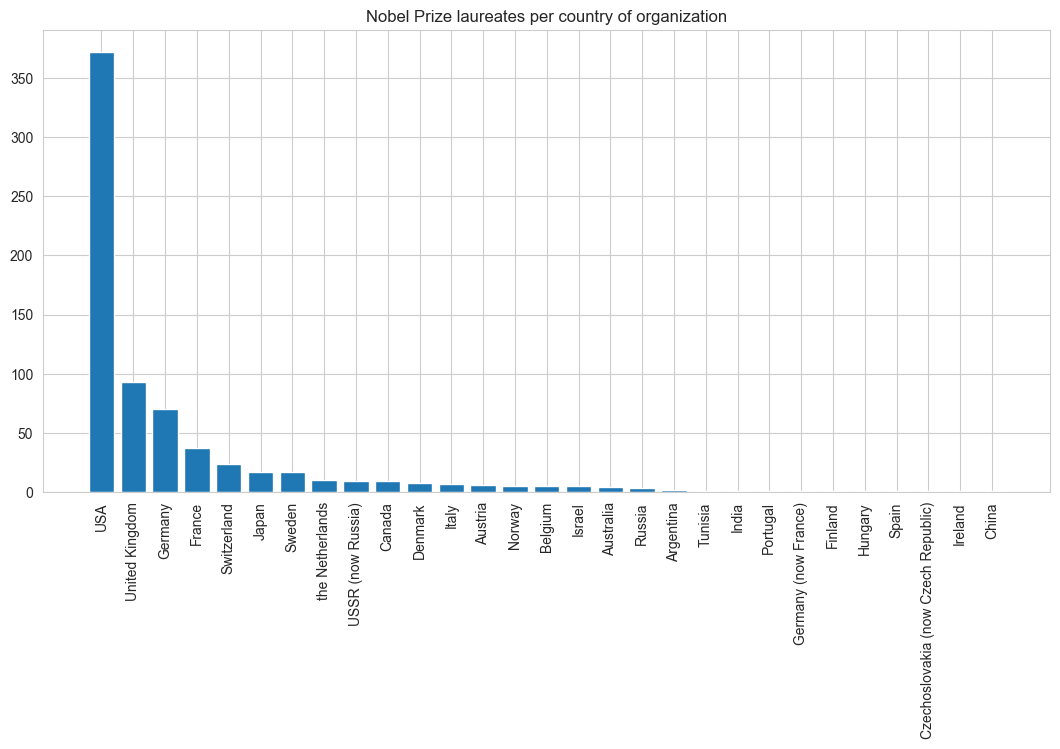

In [39]:
fig = plt.figure(figsize = (13, 6))

# creating the bar plot
vals = laureates['Organization country'].value_counts(sort=True)
plt.bar(vals.index, vals)

plt.title("Nobel Prize laureates per country of organization")
plt.xticks(rotation=90)
plt.savefig("img/laureates_per_country.jpg", bbox_inches='tight', pad_inches=0.2)
plt.show()

In [40]:
print("Laureates with controversial country:")
laureates[(laureates['Born country code'] == 'GP')]

Laureates with controversial country:


Firstname Surname        Born        Died       Born country  \
Id                                                                   
631  Saint-John   Perse  1887-05-31  1975-09-20  Guadeloupe Island   

    Born country code       Born city Died country Died country code  \
Id                                                                     
631                GP  Pointe-à-Pitre       France                FR   

               Died city Gender  Year    Category Overall motivation  \
Id                                                                     
631  Presqu'île-de-Giens   male  1960  Literature                NaN   

                                            Motivation Organization name  \
Id                                                                         
631  "for the soaring flight and the evocative imag...               NaN   

    Organization city Organization country Geo Shape Geo Point 2D  
Id                                                                 
631               NaN                  NaN       NaN          NaN

In [41]:
laureates[laureates['Organization country'] == "Germany (now France)"]

Firstname Surname        Born        Died                Born country  \
Id                                                                          
14  Ferdinand   Braun  1850-06-06  1918-04-20  Hesse-Kassel (now Germany)   

   Born country code Born city Died country Died country code    Died city  \
Id                                                                           
14                DE     Fulda          USA                US  Brooklyn NY   

   Gender  Year Category Overall motivation  \
Id                                            
14   male  1909  Physics                NaN   

                                           Motivation      Organization name  \
Id                                                                             
14  "in recognition of their contributions to the ...  Strasbourg University   

   Organization city  Organization country  \
Id                                           
14        Strasbourg  Germany (now France)   

                                            Geo Shape  \
Id                                                      
14  {"coordinates": [[[[55.501312696, -20.87322356...   

                              Geo Point 2D  
Id                                          
14  42.182029178537626,-2.7544221494581898

Selection of the scientific categories

In [42]:
stem_laureates = laureates[(laureates.Year > 1959) & ((laureates.Category == 'Physics') | (laureates.Category == 'Medicine') | (laureates.Category == 'Chemistry'))]
n_stem_laureates = len(stem_laureates)
n_years = len(stem_laureates.Year.unique())
print("Data studied: ", n_stem_laureates, " STEM Nobel Prizes (Physics, Chemistry, Medicine) distributed on ",  n_years,
      " years, from ", stem_laureates.Year.min(), " to ", stem_laureates.Year.max(), "\n",
      round(n_stem_laureates/n_years/3, 1), " laureates per prize on average", sep='')

Data studied: 419 STEM Nobel Prizes (Physics, Chemistry, Medicine) distributed on 62 years, from 1960 to 2021
2.3 laureates per prize on average


In [43]:
code_country = pd.read_csv('data/country_codes.csv', index_col=0).squeeze()
code_country.name = "country_code"
code_country['USA'] = 'US'
#code_country['USSR'] = 'SU'
code_country['the Netherlands'] = 'NL'
code_country['Russia'] = 'RU'
no_country = 0

laureate_country = set()
laureate_country_codes = set()
from math import isnan
for idx, laureate in stem_laureates.iterrows():
    country = laureate['Organization country']

    if country not in laureate_country_codes:
        if type(country) != str:
            country = laureate['Died country']

            if type(country) == str:
                print(laureate['Firstname'], laureate['Surname'], "does not have an organization country")
            else:
                print(laureate['Firstname'], laureate['Surname'], "does not have an organization country or a died country")
                country = laureate['Born country']

        if type(country) == str:
            if country.find("(") != -1:

                current_country = country[country.find("(")+ (1 if country.find("now") == -1 else 5):-1]
                print("Old country", country[: country.find("(")-1], "used rather than current one", current_country)
                country = country[: country.find("(")-1]

            if country in code_country:
                laureate_country.add(country)
                laureate_country_codes.add(code_country[country])
            else:
                print('Unknown country:', country)
        else:
            no_country += 1
            print(laureate['Firstname'], laureate['Surname'], "does not have a country")
            stem_laureates.drop(idx)
    if country == 'USA':
        country = 'United States'
    elif country == 'USSR':
        country = "Russia"
    elif country == "the Netherlands":
        country = "Netherlands"
    stem_laureates.loc[idx, "country"] = country

n_countries = len(laureate_country_codes)

print("\n", no_country, " laureates with no country information (neither organization, died nor born country)\n",
      n_countries, " countries with a STEM Nobel Prize laureate: ", ', '.join(laureate_country), "\n\nSTEM Nobel Prize laureates:", sep='')
stem_laureates

Old country USSR used rather than current one Russia
Unknown country: USSR
William Knowles does not have an organization country
Old country USSR used rather than current one Russia
Unknown country: USSR
Old country USSR used rather than current one Russia
Unknown country: USSR
Old country USSR used rather than current one Russia
Unknown country: USSR
Kary B. Mullis does not have an organization country
Kip S. Thorne does not have an organization country or a died country
Barry C. Barish does not have an organization country or a died country
J. Robin Warren does not have an organization country or a died country
Robert J. Lefkowitz does not have an organization country or a died country
Rainer Weiss does not have an organization country or a died country
Martinus J.G. Veltman does not have an organization country

0 laureates with no country information (neither organization, died nor born country)
19 countries with a STEM Nobel Prize laureate: Switzerland, Germany, Denmark, Argentina

C:\Users\tdcba\AppData\Local\Temp\ipykernel_9524\1210335619.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stem_laureates.loc[idx, "country"] = country


Firstname         Surname        Born        Died          Born country  \
Id                                                                              
75       Robert      Hofstadter  1915-02-05  1990-11-17                   USA   
79        Maria  Goeppert Mayer  1906-06-28  1972-02-20  Germany (now Poland)   
82   Nicolay G.           Basov  1922-12-14  2001-07-01     USSR (now Russia)   
104       James       Rainwater  1917-12-09  1986-03-31                   USA   
789    Barry J.        Marshall  1951-09-30         NaN             Australia   
..          ...             ...         ...         ...                   ...   
150  Douglas D.        Osheroff  1945-08-01         NaN                   USA   
287     Paul D.           Boyer  1918-07-31  2018-06-02                   USA   
379      Feodor           Lynen  1911-04-06  1979-08-06               Germany   
406       David       Baltimore  1938-03-07         NaN                   USA   
991  Emmanuelle     Charpentier  1968-12-11         NaN                France   

    Born country code                 Born city Died country  \
Id                                                             
75                 US               New York NY          USA   
79                 PL  Kattowitz (now Katowice)          USA   
82                 RU                     Usman       Russia   
104                US                Council ID          USA   
789                AU                Kalgoorlie          NaN   
..                ...                       ...          ...   
150                US               Aberdeen WA          NaN   
287                US                  Provo UT          USA   
379                DE                    Munich      Germany   
406                US               New York NY          NaN   
991                FR           Juvisy-sur-Orge          NaN   

    Died country code       Died city  ...  Year   Category  \
Id                                     ...                    
75                 US     Stanford CA  ...  1961    Physics   
79                 US    San Diego CA  ...  1963    Physics   
82                 RU          Moscow  ...  1964    Physics   
104                US      Yonkers NY  ...  1975    Physics   
789               NaN             NaN  ...  2005   Medicine   
..                ...             ...  ...   ...        ...   
150               NaN             NaN  ...  1996    Physics   
287                US  Los Angeles CA  ...  1997  Chemistry   
379                DE          Munich  ...  1964   Medicine   
406               NaN             NaN  ...  1975   Medicine   
991               NaN             NaN  ...  2020  Chemistry   

    Overall motivation                                         Motivation  \
Id                                                                          
75                 NaN  "for his pioneering studies of electron scatte...   
79                 NaN  "for their discoveries concerning nuclear shel...   
82                 NaN  "for fundamental work in the field of quantum ...   
104                NaN  "for the discovery of the connection between c...   
789                NaN  "for their discovery of the bacterium <i>Helic...   
..                 ...                                                ...   
150                NaN  "for their discovery of superfluidity in heliu...   
287                NaN  "for their elucidation of the enzymatic mechan...   
379                NaN  "for their discoveries concerning the mechanis...   
406                NaN  "for their discoveries concerning the interact...   
991                NaN  "for the development of a method for genome ed...   

                                     Organization name Organization city  \
Id                                                                         
75                                 Stanford University       Stanford CA   
79                            University of California      San Diego

In [44]:
# Get the number of Nobel Prizes per [Country]x[Year]x[Country code]x[Category]
nobel_prizes = stem_laureates.rename(columns={'Year': 'year'}).groupby(['year', 'country', 'Category']).size()

nobel_prizes.name = "Nobel Prize number"
nobel_prizes = nobel_prizes.reset_index()
print("List of Nobel Prize winnings by Country and Year:")
nobel_prizes

List of Nobel Prize winnings by Country and Year:


year         country   Category  Nobel Prize number
0    1960       Australia   Medicine                   1
1    1960  United Kingdom   Medicine                   1
2    1960   United States  Chemistry                   1
3    1960   United States    Physics                   1
4    1961         Germany    Physics                   1
..    ...             ...        ...                 ...
288  2021         Germany    Physics                   1
289  2021           Italy    Physics                   1
290  2021   United States  Chemistry                   1
291  2021   United States   Medicine                   2
292  2021   United States    Physics                   1

[293 rows x 4 columns]

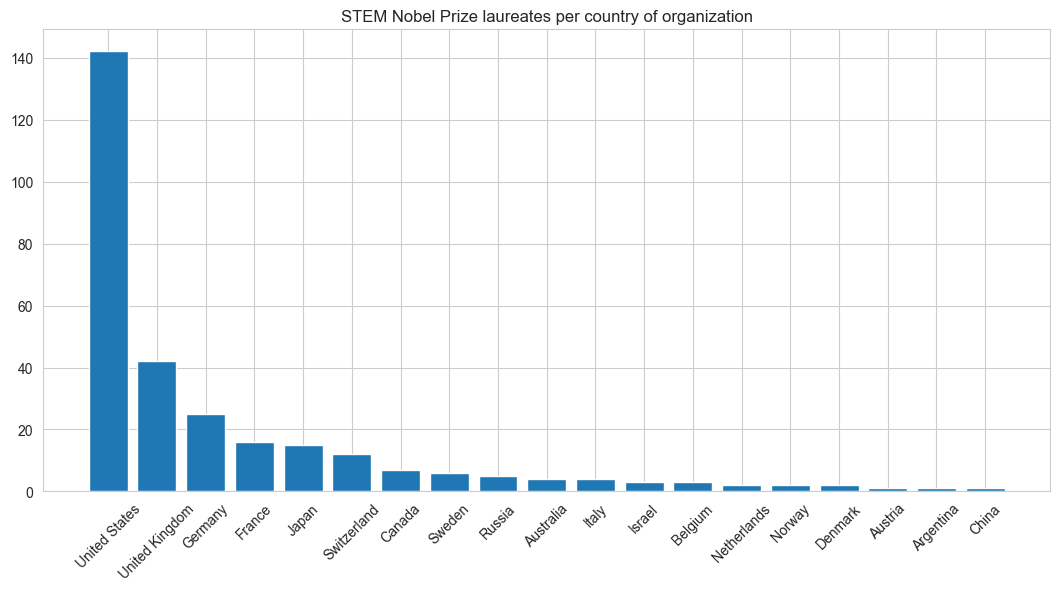

In [45]:
fig = plt.figure(figsize = (13, 6))

# creating the bar plot
vals = nobel_prizes.country.value_counts(sort=True)
plt.bar(vals.index, vals)

plt.title("STEM Nobel Prize laureates per country of organization")
plt.xticks(rotation=45)
plt.savefig("img/stem_laureates_per_country.jpg", bbox_inches='tight', pad_inches=0.2)
plt.show()

## 1) Automatically pre-select relevant indicators
### A) Select indicators based on keywords

In [46]:
keywords = {'GDP', 'literacy', 'education', 'school', 'income', 'technology', 'research', 'patent', 'human rights', 'life expectancy', 'population', 'development'}
indicators = pd.DataFrame()
sources = set()
for keyword in keywords:
    results = pd.DataFrame(wbdata.search_indicators(keyword)).set_index('id')
    print('Keyword [', keyword, "]: ", len(results), " indicators found", sep='')
    for indicator_id in results.index:
        if len(indicators) > 0 and (indicators.index == indicator_id).any():
            indicators.loc[indicator_id, 'keyword'] = indicators.loc[indicator_id, 'keyword'] + ", " + keyword
            results.drop(indicator_id, inplace=True)
    results['keyword'] = keyword
    indicators = pd.concat([indicators, results])
    #indicators.update(results.id)
    sources.update(set(results.source.apply(lambda var: var['value']).unique()))
indicators = indicators[~indicators.index.duplicated(keep='first')]
indicators['sourceName'] = indicators.source.apply(lambda var: var['value'])
n_indicators = len(indicators)
print("\nTotal number of indicators selected", n_indicators)
indicators

Keyword [education]: 2496 indicators found
Keyword [technology]: 51 indicators found
Keyword [human rights]: 1 indicators found
Keyword [literacy]: 159 indicators found
Keyword [school]: 1365 indicators found
Keyword [GDP]: 540 indicators found
Keyword [life expectancy]: 38 indicators found
Keyword [development]: 90 indicators found
Keyword [research]: 7 indicators found
Keyword [income]: 359 indicators found
Keyword [population]: 2215 indicators found
Keyword [patent]: 2 indicators found

Total number of indicators selected 6202


name  \
id                                                                                 
3.1_LOW.SEC.NEW.TEACHERS       Lower secondary education, new teachers, natio...   
3.1_PRI.NEW.ENTRANTS            Primary education, new entrants, national source   
3.11_LOW.SEC.CLASSROOMS        Lower secondary education, classrooms, nationa...   
3.12_LOW.SEC.NEW.CLASSROOMS    Lower secondary education, new classrooms, nat...   
3.13_PRI.MATH.BOOK.PER.PUPIL   Ratio of textbooks per pupil, primary educatio...   
...                                                                          ...   
UIS.YADULT.PROFINUMERACY.NON   Proportion of population achieving at least a ...   
UIS.YADULT.PROFINUMERACY.NPIA  Proportion of population achieving at least a ...   
UIS.YADULT.PROFINUMERACY.WPIA  Proportion of population achieving at least a ...   
IP.PAT.NRES                                    Patent applications, nonresidents   
IP.PAT.RESD                                       Patent applications, residents   

                              unit  \
id                                   
3.1_LOW.SEC.NEW.TEACHERS             
3.1_PRI.NEW.ENTRANTS                 
3.11_LOW.SEC.CLASSROOMS              
3.12_LOW.SEC.NEW.CLASSROOMS          
3.13_PRI.MATH.BOOK.PER.PUPIL         
...                            ...   
UIS.YADULT.PROFINUMERACY.NON         
UIS.YADULT.PROFINUMERACY.NPIA        
UIS.YADULT.PROFINUMERACY.WPIA        
IP.PAT.NRES                          
IP.PAT.RESD                          

                                                                          source  \
id                                                                                 
3.1_LOW.SEC.NEW.TEACHERS       {'id': '34', 'value': 'Global Partnership for ...   
3.1_PRI.NEW.ENTRANTS           {'id': '34', 'value': 'Global Partnership for ...   
3.11_LOW.SEC.CLASSROOMS        {'id': '34', 'value': 'Global Partnership for ...   
3.12_LOW.SEC.NEW.CLASSROOMS    {'id': '34', 'value': 'Global Partnership for ...   
3.13_PRI.MATH.BOOK.PER.PUPIL   {'id': '34', 'value': 'Global Partnership for ...   
...                                                                          ...   
UIS.YADULT.PROFINUMERACY.NON       {'id': '12', 'value': 'Education Statistics'}   
UIS.YADULT.PROFINUMERACY.NPIA      {'id': '12', 'value': 'Education Statistics'}   
UIS.YADULT.PROFINUMERACY.WPIA      {'id': '12', 'value': 'Education Statistics'}   
IP.PAT.NRES                    {'id': '2', 'value': 'World Development Indica...   
IP.PAT.RESD                    {'id': '2', 'value': 'World Development Indica...   

                                                                      sourceNote  \
id                                                                                 
3.1_LOW.SEC.NEW.TEACHERS       Persons employed for the first time in an offi...   
3.1_PRI.NEW.ENTRANTS           Pupils entering primary school for the first t...   
3.11_LOW.SEC.CLASSROOMS        Number of rooms or single accommodations, mini...   
3.12_LOW.SEC.NEW.CLASSROOMS    Number of rooms or single accommodations, mini...   
3.13_PRI.MATH.BOOK.PER.PUPIL   Number of books used by a single pupil used as...   
...                                                                          ...   
UIS.YADULT.PROFINUMERACY.NON                                                       
UIS.YADULT.PROFINUMERACY.NPIA                                                      
UIS.YADULT.PROFINUMERACY.WPIA                                                      
IP.PAT.NRES                    Patent applications are worldwide patent appli...   
IP.PAT.RESD                    Patent applications are worldwide patent appli...   

                                                              sourceOrganization  \
id                                                                                 
3.1_LOW.SEC.NEW.TEACHERS       Data were collected from national and other pu...   
3.1_PRI.NEW.ENTRANTS           Data were collected

### B) Remove irrelevant indicators based on keywords

In [47]:
n_indicators = len(indicators)
dropped_indicators = set()

indicators['stem_name'] = indicators.name.str.lower()

db_countries = wbdata.get_dataframe({'TM.VAL.MRCH.R1.ZS': 'val'}).index.get_level_values('country')

for keyword in set(db_countries.str.lower()) - {'world', 'low income'}:
    to_remove = indicators.index[indicators.stem_name.apply(lambda name: True if keyword in name else False)]

    if len(to_remove) > 0:
        print("Keyword to remove [", keyword, "] contained in ", len(to_remove), " indicators", sep='')
        dropped_indicators.update(indicators.loc[to_remove, 'name'])
        indicators.drop(to_remove, axis=0, inplace=True)

indicators.stem_name = indicators.stem_name.apply(
    lambda name: word_tokenize(''.join([character for character in name if not character.isdigit() and character not in punctuation])))

for keyword in {'quintile', 'gender', 'male', 'female'}:
    #to_remove = indicators.index[indicators.name.str.find(keyword) != -1]
    to_remove = indicators.index[indicators.stem_name.apply(lambda name: True if keyword in name else False)]
    print("Keyword to remove [", keyword, "] contained in ", len(to_remove), " indicators", sep='')
    dropped_indicators.update(indicators.loc[to_remove, 'name'])
    indicators.drop(to_remove, axis=0, inplace=True)
print("\n", n_indicators - len(indicators), " indicators removed (", round(100*(n_indicators - len(indicators))/n_indicators), "%)\n",
      len(indicators), " indicators selected", sep='')

Keyword to remove [spain] contained in 1 indicators
Keyword to remove [european union] contained in 2 indicators
Keyword to remove [burkina faso] contained in 16 indicators
Keyword to remove [east asia & pacific] contained in 3 indicators
Keyword to remove [niger] contained in 20 indicators
Keyword to remove [netherlands] contained in 7 indicators
Keyword to remove [india] contained in 2 indicators
Keyword to remove [mozambique] contained in 14 indicators
Keyword to remove [ireland] contained in 2 indicators
Keyword to remove [finland] contained in 2 indicators
Keyword to remove [middle east & north africa] contained in 3 indicators
Keyword to remove [sub-saharan africa] contained in 3 indicators
Keyword to remove [vietnam] contained in 15 indicators
Keyword to remove [timor-leste] contained in 11 indicators
Keyword to remove [denmark] contained in 2 indicators
Keyword to remove [djibouti] contained in 26 indicators
Keyword to remove [italy] contained in 2 indicators
Keyword to remove 

### C) Filter indicators based on missing data percentage
#### a) Import previously saved data (optional)

In [66]:
# To analyse all indicators
unusable_indicators = set()
empty_indicators = set()
preselected_indicators = set()

# To analyse only not already processed indicators
with open('data/generated/unusable_indicators_v2.pyc', 'rb') as file:
    unusable_indicators = pickle.load(file)
with open('data/generated/empty_indicators_v2.pyc', 'rb') as file:
    empty_indicators = pickle.load(file)
with open('data/generated/preselected_indicators_v2.pyc', 'rb') as file:
    preselected_indicators = pickle.load(file)

print("\n", len(unusable_indicators), " non usable indicators, ", len(empty_indicators), " empty indicators and ",
      len(preselected_indicators), " usable indicators already identified", sep='')

#indicators.drop(empty_indicators | preselected_indicators, axis=0, inplace=True)
#indicators.drop(unusable_indicators | empty_indicators | preselected_indicators, axis=0, inplace=True)
#indicators.drop(unusable_indicators | empty_indicators, axis=0, inplace=True)
#indicators = indicators.loc[selected_indicators]

print(len(indicators), "indicators to process")

indicators


398 non usable indicators, 2519 empty indicators and 533 usable indicators already identified
533 indicators to process


keyword  \
id                                      
fin17a.t.d.8                   income   
UIS.X.USCONST.02.FSGOV      education   
fin15.t.d.2017.7               income   
NY.GDP.PETR.RT.ZS                 GDP   
g20.made.t.d.7                 income   
...                               ...   
per_lmonl.overlap_pop_tot  population   
fin44b3.d.8                    income   
fin44c2.d.8                    income   
fin21b.2014.6               education   
SE.SEC.AGES                    school   

                                                                        name  \
id                                                                             
fin17a.t.d.8               Saved at a financial institution, income, rich...   
UIS.X.USCONST.02.FSGOV     Government expenditure on pre-primary educatio...   
fin15.t.d.2017.7           Saved to start, operate, or expand a farm or b...   
NY.GDP.PETR.RT.ZS                                       Oil rents (% of GDP)   
g20.made.t.d.7             Made a digital payment, income, poorest 40% (%...   
...                                                                      ...   
per_lmonl.overlap_pop_tot         Population only receiving Labor Market (%)   
fin44b3.d.8                Worried about not being able to pay for medica...   
fin44c2.d.8                Worried about not having enough money for mont...   
fin21b.2014.6              Borrowed from a store by buying on credit, sec...   
SE.SEC.AGES                      Lower secondary school starting age (years)   

                                                                 description  \
id                                                                             
fin17a.t.d.8               The percentage of respondents who report savin...   
UIS.X.USCONST.02.FSGOV     Total general (local, regional and central) go...   
fin15.t.d.2017.7           The percentage of respondents who report savin...   
NY.GDP.PETR.RT.ZS          Oil rents are the difference between the value...   
g20.made.t.d.7             The percentage of respondents who report using...   
...                                                                      ...   
per_lmonl.overlap_pop_tot  Percentage of population only receiving Labor ...   
fin44b3.d.8                The percentage of respondents who are not worr...   
fin44c2.d.8                The percentage of respondents who are somewhat...   
fin21b.2014.6              The percentage of respondents who report borro...   
SE.SEC.AGES                Lower secondary school starting age is the age...   

                                                                    database  \
id                                                                             
fin17a.t.d.8                                      Global Financial Inclusion   
UIS.X.USCONST.02.FSGOV                                  Education Statistics   
fin15.t.d.2017.7                                  Global Financial Inclusion   
NY.GDP.PETR.RT.ZS                               World Development Indicators   
g20.made.t.d.7                                    Global Financial Inclusion   
...                                                                      ...   
per_lmonl.overlap_pop_tot  The Atlas of Social Protection: Indicators of ...   
fin44b3.d.8                                       Global Financial Inclusion   
fin44c2.d.8                                       Global Financial Inclusion   
fin21b.2014.6                                     Global Financial Inclusion   
SE.SEC.AGES                                     World Development Indicators   

                                                         source organization  
id                                                                            
fin17a.t.d.8                                          Global Findex database  
UIS.X.USCONST.02.FSGOV                       UNESCO Institute for Statistics  
fin15.t.d.2017.7                                      Glo

#### b) Import and filter indicators database per database
List databases with their number of indicators

In [49]:
databases = indicators.groupby('sourceName').size().sort_values()
databases.name = "Number of indicators"
databases

sourceName
Sustainable Development Goals                                             1
Subnational Population                                                    1
PEFA 2011                                                                 1
Millennium Development Goals                                              1
Enterprise Surveys                                                        1
Global Economic Prospects                                                 1
Human Capital Index                                                       2
 International Debt Statistics: DSSI                                      3
Statistical Capacity Indicators                                           3
ICP 2017                                                                  3
Sustainable Energy for All                                                4
Global Financial Inclusion and Consumer Protection Survey (Internal)      4
Global Public Procurement                                                 4
G

In [15]:
df = []
size = 50

code_indicators = dict(zip(indicators.index, indicators.name))

for databaseName in databases.index:

    indicators_from_db = indicators[indicators.sourceName == databaseName]
    print("\nDatabase [", databaseName, "]: ", len(indicators_from_db), " indicators", sep='')
    these_indicators_list = [indicators_from_db.iloc[i*size:i*size+size,:] for i in range(ceil(len(indicators_from_db)/size))]

    pass_indicator = False
    for these_indicators in these_indicators_list:
        start = time.time()

        if not pass_indicator:
            columns = dict(zip(these_indicators.index, these_indicators.index))

            #print("Database [", databaseName, "], ", len(these_indicators), " indicators", sep='')
            n_countries = len(laureate_country_codes)
            try:
                df_indicators = wbdata.get_dataframe(columns, country=laureate_country_codes).squeeze()
            except RuntimeError:
                print("Country data missing (", round(time.time() - start), "s of execution): ", end='', sep='')
                df_indicators = []
                missing_countries = 0
                for laureate_country in laureate_country_codes:
                    try:
                        data = wbdata.get_dataframe(columns, country=[laureate_country], keep_levels=True)
                        df_indicators.append(data)
                    except (RuntimeError, TypeError):  #IndexError or TypeError or
                        missing_countries += 1
                        print(laureate_country + ', ', sep='', end='')
                print("(", round(100*missing_countries/n_countries), "%)", sep='')
                if len(df_indicators) > 0:
                    n_countries -= missing_countries
                    df_indicators = pd.concat(df_indicators)
                else:
                    pass_indicator = True

                # for this_indicator in columns:
                #     df_indicator = []
                #     for laureate_country in laureate_country_codes:
                #         try:
                #             data = wbdata.get_dataframe({this_indicator: this_indicator}, country=[laureate_country], keep_levels=True)
                #             df_indicator.append(data)
                #         except (RuntimeError, TypeError):  #IndexError or TypeError or
                #             missing_countries += 1
                #             print(laureate_country + ', ', sep='', end='')
                #     print("(", round(100*missing_countries/n_countries), "%)\n", sep='')
                #     if len(df_indicator) > 0:
                #         df_indicators = df_indicators.append(df_indicator)
                # if len(df_indicators) > 0:
                #     df_indicators = pd.concat(df_indicators)
                # else:
                #     pass_indicator = True

            except Exception as e:
                pass_indicator = True
                print(len(columns), " indicators unusable: error ", e, " (", round(time.time() - start), " s of execution)", sep='')
                unusable_indicators.update(these_indicators.index)

        if pass_indicator:
            empty_indicators.update(these_indicators.index)
            print(len(these_indicators), " indicators with no data on the relevant countries (", round((time.time() - start)/60, 1), " min of execution)", sep='')
        else:
            if type(df_indicators) == pd.Series:
                df_indicators = df_indicators.to_frame()

            if type(df_indicators.index) == pd.MultiIndex:
                indx = df_indicators.index.get_level_values('date')
                dates = indx[indx.str.len() == 4].astype(int)
                wdates = indx[indx.str.len() != 4]
                if len(wdates) > 0:
                    print("Wrong date indexes:", ', '.join(wdates))
                    if len(dates) < 2:
                        print("Indicators dropped")

                if len(dates) > 1:
                    to_remove = df_indicators.columns[df_indicators.isnull().sum()/((1 + dates.max() - dates.min())*n_countries) > 0.3]
                else:
                    to_remove = df_indicators.columns
            else:
                to_remove = df_indicators.columns

            if len(to_remove) > 0:
                 # '\n'.join(to_remove.to_list()))
                empty_indicators.update(to_remove)

            if len(to_remove) < len(columns):
                if len(to_remove) > 0:
                    print(len(columns) - len(to_remove), "/", len(columns), " indicators with enough data (", round((time.time() - start)/60, 1), " min of execution)", sep='')
                else:
                    print("All ", len(columns), " indicators selected (", round((time.time() - start)/60, 1), " min of execution)", sep='')

                preselected_indicators.update(df_indicators.columns)
                df.append(df_indicators.rename(columns=code_indicators))
            else:
                print("No indicator with enough data among the ", len(to_remove), " (", round((time.time() - start)/60, 1), " min of execution)", sep='')

        # Save the results in case of crash
        with open('data/unusable_indicators_v2.pyc', 'wb') as file:
            pickle.dump(unusable_indicators, file)
        with open('data/empty_indicators_v2.pyc', 'wb') as file:
            pickle.dump(empty_indicators, file)
        with open('data/preselected_indicators_v2.pyc', 'wb') as file:
            pickle.dump(preselected_indicators, file)

# Assemble the final dataset
if len(df) > 1:
    df = pd.concat(df, axis=1)
    df.to_csv("data/generated/preselected_data.csv")

print("Output:\n", len(preselected_indicators), " usable indicators\n",
      len(empty_indicators), " indicators with not enough data\n", len(unusable_indicators), " indicators non importable", sep='')


Database [World Development Indicators]: 113 indicators
25/50 indicators with not enough data (1.8 min of execution)
32/50 indicators with not enough data (2.7 min of execution)
7/13 indicators with not enough data (0.6 min of execution)

Database [Global Financial Inclusion]: 365 indicators
4/50 indicators with not enough data (0.5 min of execution)
10/50 indicators with not enough data (0.5 min of execution)
7/50 indicators with not enough data (0.6 min of execution)
11/50 indicators with not enough data (0.6 min of execution)
23/50 indicators with not enough data (0.8 min of execution)
8/50 indicators with not enough data (0.8 min of execution)
8/50 indicators with not enough data (0.6 min of execution)
4/15 indicators with not enough data (0.2 min of execution)

Database [Global Jobs Indicators Database (JOIN)]: 419 indicators
No indicator with enough data among the 50 (1.7 min of execution)
No indicator with enough data among the 50 (1.9 min of execution)
No indicator with enough

Saves outputs of the run (even when interrupted)

In [50]:
print("Keywords without indicators:", ', '.join(keywords - set(indicators.keyword.unique())))
indicators = indicators.loc[preselected_indicators].reindex(columns=('keyword', 'name', 'sourceNote', 'sourceName', 'sourceOrganization')).rename(columns={'sourceNote': 'description', 'sourceName': 'database', 'sourceOrganization': 'source organization'})
indicators.to_csv('data/generated/preselected_indicators.csv')
indicators

Keywords without indicators: 


C:\Users\tdcba\AppData\Local\Temp\ipykernel_9524\3059566540.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  indicators = indicators.loc[preselected_indicators].reindex(columns=('keyword', 'name', 'sourceNote', 'sourceName', 'sourceOrganization')).rename(columns={'sourceNote': 'description', 'sourceName': 'database', 'sourceOrganization': 'source organization'})


keyword  \
id                                      
fin17a.t.d.8                   income   
UIS.X.USCONST.02.FSGOV      education   
fin15.t.d.2017.7               income   
NY.GDP.PETR.RT.ZS                 GDP   
g20.made.t.d.7                 income   
...                               ...   
per_lmonl.overlap_pop_tot  population   
fin44b3.d.8                    income   
fin44c2.d.8                    income   
fin21b.2014.6               education   
SE.SEC.AGES                    school   

                                                                        name  \
id                                                                             
fin17a.t.d.8               Saved at a financial institution, income, rich...   
UIS.X.USCONST.02.FSGOV     Government expenditure on pre-primary educatio...   
fin15.t.d.2017.7           Saved to start, operate, or expand a farm or b...   
NY.GDP.PETR.RT.ZS                                       Oil rents (% of GDP)   
g20.made.t.d.7             Made a digital payment, income, poorest 40% (%...   
...                                                                      ...   
per_lmonl.overlap_pop_tot         Population only receiving Labor Market (%)   
fin44b3.d.8                Worried about not being able to pay for medica...   
fin44c2.d.8                Worried about not having enough money for mont...   
fin21b.2014.6              Borrowed from a store by buying on credit, sec...   
SE.SEC.AGES                      Lower secondary school starting age (years)   

                                                                 description  \
id                                                                             
fin17a.t.d.8               The percentage of respondents who report savin...   
UIS.X.USCONST.02.FSGOV     Total general (local, regional and central) go...   
fin15.t.d.2017.7           The percentage of respondents who report savin...   
NY.GDP.PETR.RT.ZS          Oil rents are the difference between the value...   
g20.made.t.d.7             The percentage of respondents who report using...   
...                                                                      ...   
per_lmonl.overlap_pop_tot  Percentage of population only receiving Labor ...   
fin44b3.d.8                The percentage of respondents who are not worr...   
fin44c2.d.8                The percentage of respondents who are somewhat...   
fin21b.2014.6              The percentage of respondents who report borro...   
SE.SEC.AGES                Lower secondary school starting age is the age...   

                                                                    database  \
id                                                                             
fin17a.t.d.8                                      Global Financial Inclusion   
UIS.X.USCONST.02.FSGOV                                  Education Statistics   
fin15.t.d.2017.7                                  Global Financial Inclusion   
NY.GDP.PETR.RT.ZS                               World Development Indicators   
g20.made.t.d.7                                    Global Financial Inclusion   
...                                                                      ...   
per_lmonl.overlap_pop_tot  The Atlas of Social Protection: Indicators of ...   
fin44b3.d.8                                       Global Financial Inclusion   
fin44c2.d.8                                       Global Financial Inclusion   
fin21b.2014.6                                     Global Financial Inclusion   
SE.SEC.AGES                                     World Development Indicators   

                                                         source organization  
id                                                                            
fin17a.t.d.8                                          Global Findex database  
UIS.X.USCONST.02.FSGOV                       UNESCO Institute for Statistics  
fin15.t.d.2017.7                                      Glo

In [11]:
preselected_indicators = pd.read_csv('data/generated/preselected_data.csv', index_col=[0, 1])
preselected_indicators

UIS.YR.ST.01T5  UIS.YR.ST.6T8  UIS.SAP.1.AGM1  UIS.SLE.02  \
country      date                                                              
Argentina    2100             NaN            NaN             NaN         NaN   
             2095             NaN            NaN             NaN         NaN   
             2090             NaN            NaN             NaN         NaN   
             2085             NaN            NaN             NaN         NaN   
             2080             NaN            NaN             NaN         NaN   
...                           ...            ...             ...         ...   
South Africa 1974          1974.0         1974.0        705285.0         NaN   
             1973          1973.0         1973.0        689735.0         NaN   
             1972          1972.0         1972.0        673823.0         NaN   
             1971          1971.0         1971.0        657480.0         NaN   
             1970          1970.0         1970.0        640824.0         NaN   

                   UIS.SLE.1  UIS.SLE.123  UIS.SLE.23  UIS.SLE.56  
country      date                                                  
Argentina    2100        NaN          NaN         NaN         NaN  
             2095        NaN          NaN         NaN         NaN  
             2090        NaN          NaN         NaN         NaN  
             2085        NaN          NaN         NaN         NaN  
             2080        NaN          NaN         NaN         NaN  
...                      ...          ...         ...         ...  
South Africa 1974        NaN          NaN         NaN         NaN  
             1973        NaN          NaN         NaN     0.22016  
             1972        NaN          NaN         NaN         NaN  
             1971        NaN          NaN         NaN         NaN  
             1970    7.45816          NaN         NaN     0.21285  

[3417 rows x 8 columns]

## 2 - merging the Nobel Prize laureates and country sets

## Importing country data

In [147]:
selected_indicators = {'6.0.GDP_growth': 'GDP growth (annual %)',
                     'BI.WAG.TOTL.GD.ZS': 'Wage bill as a percentage of GDP',
                     'SE.PRM.DURS': 'Primary education, duration (years)',
                     'FB.CAP.LEGL.DF.FE': 'Have a formal definition for financial education or financial literacy or financial capability',
                     'FB.INC.NSTR.FC.DV': 'National financial capability/literacy/education strategy (NFCS/NFLS/NFES) under development',
                     'IP.PAT.NRES': 'Patent applications, nonresidents',
                     'IP.PAT.RESD': 'Patent applications, residents',
                     'C1.8': 'Gross national income per capita',
                     'IC.REG.DFRN.PC.DFRN': 'Starting a business: Paid-in Minimum capital (% of income per capita) - Score',
                     'SP.DYN.LE00.IN': 'Life expectancy at birth, total (years)',
                     'SE.XPD.TOTL.GD.ZS': 'Government expenditure on education, total (% of GDP)',
                     'SE.TER.ENRR': 'School enrollment, tertiary (% gross)',
                     'SI.DST.10TH.10': 'Income share held by highest 10%',
                     'NY.GDP.PCAP.KD': 'GDP per capita (constant 2015 US$)',
                     'TX.VAL.TECH.CD': 'High-technology exports (current US$)',
                     'GB.XPD.RSDV.GD.ZS': 'Research and development expenditure (% of GDP)',
                     'SP.POP.SCIE.RD.P6': 'Researchers in R&D (per million people)',
                     # 'SP.POP.1564.TO.ZS': 'Population ages 15-64 (% of total population)',
                     'EN.URB.MCTY.TL.ZS': 'Population in urban agglomerations of more than 1 million (% of total population)',
                     'SP.POP.TOTL': 'Population, total',
                     'NY.GDP.MKTP.PP.KD': 'GDP, PPP (constant 2017 international $)'
}

## Import selected data

In [148]:
country_data = wbdata.get_dataframe(selected_indicators, country=laureate_country_codes - {'SU'}).reset_index().rename(columns={'date': 'year'})
country_data.year = country_data.year.astype(int)
# df_indicator = []
# for indicator_id in columns:
#     print(indicator_id)
#     df_indicator.append(wbdata.get_dataframe({indicator_id: columns[indicator_id]}, country=laureate_country_codes, keep_levels=True))
country_data

country  year  GDP growth (annual %)  \
0         Argentina  1960                    NaN   
1         Argentina  1961                    NaN   
2         Argentina  1962                    NaN   
3         Argentina  1963                    NaN   
4         Argentina  1964                    NaN   
...             ...   ...                    ...   
1194  United States  2017                    NaN   
1195  United States  2018                    NaN   
1196  United States  2019                    NaN   
1197  United States  2020                    NaN   
1198  United States  2021                    NaN   

      Wage bill as a percentage of GDP  Primary education, duration (years)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   
...                                ...                                  ...   
1194                          9.325458                                  6.0   
1195                          9.257620                                  6.0   
1196                          9.207793                                  6.0   
1197                          9.504818                                  6.0   
1198                               NaN                                  6.0   

      Have a formal definition for financial education or financial literacy or financial capability  \
0                                                   0.0                                                
1                                                   0.0                                                
2                                                   0.0                                                
3                                                   0.0                                                
4                                                   0.0                                                
...                                                 ...                                                
1194                                                NaN                                                
1195                                                NaN                                                
1196                                                NaN                                                
1197                                                NaN                                                
1198                                                NaN                                                

      National financial capability/literacy/education strategy (NFCS/NFLS/NFES) under development  \
0                                                   0.0                                              
1                                                   0.0                                              
2                                                   0.0                                              
3                                                   0.0                                              
4                                                   0.0                                              
...                                                 ...                                              
1194                                                NaN                                              
1195                                                NaN                                              
1196                                                NaN                                              
1197                                                NaN                                              
1198                                                NaN            

## Deal with countries having changed of name

In [149]:
vals = country_data[(country_data.country == "Russian Federation")].dropna(axis=1, how='all').drop(['country'], axis=1)

for year in vals.year:
    idx = country_data.index[(country_data.country == "Russia") & (country_data.year == year)]
    #print(idx)
    if len(idx) == 0:
        country_data.loc[(country_data.country == "Russian Federation") & (country_data.year == year), 'country'] = "Russia"
    else:
        for val in vals.loc[vals.year == year]:
            if val != 'year':
                country_data.loc[idx, val] = vals.loc[vals.year == year, val]
        country_data.drop(vals.index[vals.year == year], inplace=True)

country_data = country_data.sort_values(['country', 'year']).set_index(['country', 'year'])
country_data

GDP growth (annual %)  Wage bill as a percentage of GDP  \
country       year                                                            
Argentina     1960                    NaN                               NaN   
              1961                    NaN                               NaN   
              1962                    NaN                               NaN   
              1963                    NaN                               NaN   
              1964                    NaN                               NaN   
...                                   ...                               ...   
United States 2017                    NaN                          9.325458   
              2018                    NaN                          9.257620   
              2019                    NaN                          9.207793   
              2020                    NaN                          9.504818   
              2021                    NaN                               NaN   

                    Primary education, duration (years)  \
country       year                                        
Argentina     1960                                  NaN   
              1961                                  NaN   
              1962                                  NaN   
              1963                                  NaN   
              1964                                  NaN   
...                                                 ...   
United States 2017                                  6.0   
              2018                                  6.0   
              2019                                  6.0   
              2020                                  6.0   
              2021                                  6.0   

                    Have a formal definition for financial education or financial literacy or financial capability  \
country       year                                                                                                   
Argentina     1960                                                0.0                                                
              1961                                                0.0                                                
              1962                                                0.0                                                
              1963                                                0.0                                                
              1964                                                0.0                                                
...                                                               ...                                                
United States 2017                                                NaN                                                
              2018                                                NaN                                                
              2019                                                NaN                                                
              2020                                                NaN                                                
              2021                                                NaN                                                

                    National financial capability/literacy/education strategy (NFCS/NFLS/NFES) under development  \
country       year                                                                                                 
Argentina     1960                                                0.0                                              
              1961                                                0.0                                              
              1962                                                0.0                                              
              1963                                                0.0                                        

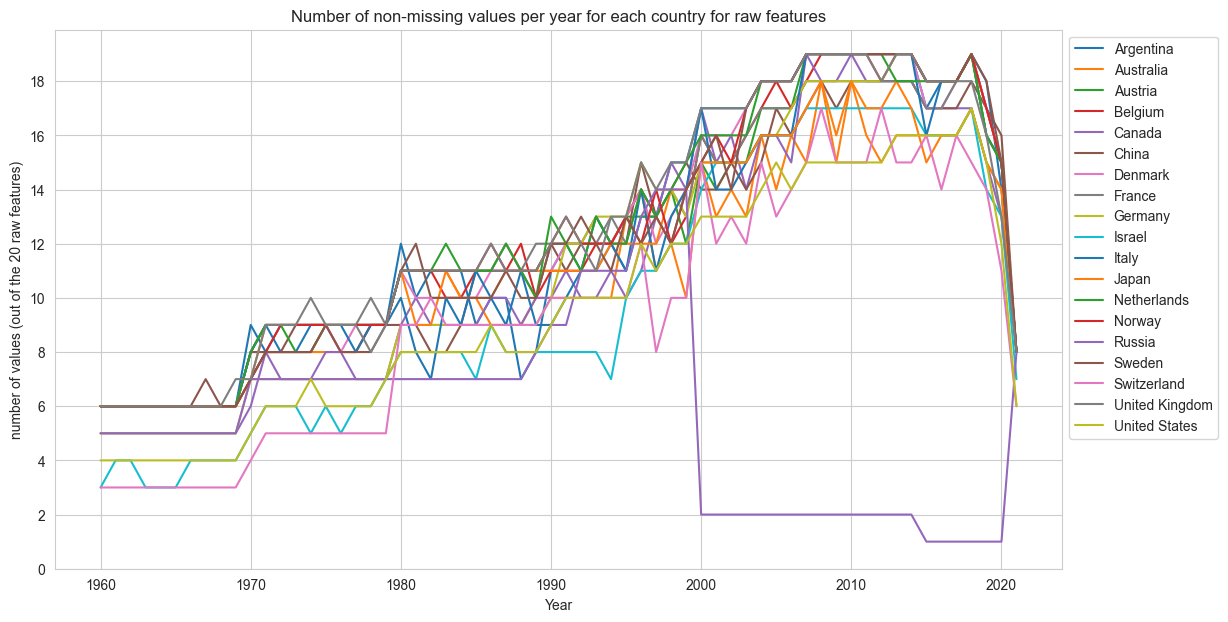

In [150]:
vals = country_data.notnull().sum(axis=1)
vals.name = "missing"
vals = vals.reset_index()

plt.figure(figsize=[13, 7])
for country in vals.country.unique():
    plt.plot(vals[vals.country == country].year, vals[vals.country == country].missing, label=country)
plt.title("Number of non-missing values per year for each country for raw features")
plt.xlabel("Year") # x label
plt.yticks(range(0, len(country_data.columns), 2))
plt.ylabel("number of values (out of the " + str(len(country_data.columns)) + " raw features)") # y label
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig("img/country_data.jpg", bbox_inches='tight', pad_inches=0.2)
plt.show() #display the plot

In [151]:
#country_data = country_data.set_index(["country", "year"])
#country_data = country_data.groupby([])
#country_data.drop(['Time Code', 'Country Code'], axis=1, inplace=True)
#country_data = country_data.replace('..', 'nan').astype(float).dropna(how='all')  # Set .. values as NaN and drop empty rows
n_combinaisons = len(country_data)
#country_data.dropna(how='all', inplace=True)  # Drop empty rows
#country_data = country_data.reset_index()
print(round(100*(n_combinaisons - len(country_data))/n_combinaisons, 1), "% of [Country]x[Year] combinations dropped\nFormatted countries dataset:", sep='')
country_data

0.0% of [Country]x[Year] combinations dropped
Formatted countries dataset:


GDP growth (annual %)  Wage bill as a percentage of GDP  \
country       year                                                            
Argentina     1960                    NaN                               NaN   
              1961                    NaN                               NaN   
              1962                    NaN                               NaN   
              1963                    NaN                               NaN   
              1964                    NaN                               NaN   
...                                   ...                               ...   
United States 2017                    NaN                          9.325458   
              2018                    NaN                          9.257620   
              2019                    NaN                          9.207793   
              2020                    NaN                          9.504818   
              2021                    NaN                               NaN   

                    Primary education, duration (years)  \
country       year                                        
Argentina     1960                                  NaN   
              1961                                  NaN   
              1962                                  NaN   
              1963                                  NaN   
              1964                                  NaN   
...                                                 ...   
United States 2017                                  6.0   
              2018                                  6.0   
              2019                                  6.0   
              2020                                  6.0   
              2021                                  6.0   

                    Have a formal definition for financial education or financial literacy or financial capability  \
country       year                                                                                                   
Argentina     1960                                                0.0                                                
              1961                                                0.0                                                
              1962                                                0.0                                                
              1963                                                0.0                                                
              1964                                                0.0                                                
...                                                               ...                                                
United States 2017                                                NaN                                                
              2018                                                NaN                                                
              2019                                                NaN                                                
              2020                                                NaN                                                
              2021                                                NaN                                                

                    National financial capability/literacy/education strategy (NFCS/NFLS/NFES) under development  \
country       year                                                                                                 
Argentina     1960                                                0.0                                              
              1961                                                0.0                                              
              1962                                                0.0                                              
              1963                                                0.0                                        

In [152]:
age = (pd.to_datetime(stem_laureates.Year, format='%Y') - pd.to_datetime(stem_laureates['Born']))/365.2425
median_age = round(age.median().days)
std_age = round(age.std().days)
print("Age when receiving the Nobel Prize: mean of ", round(age.mean().days), "yo, median of ", median_age,
      "yo, standard deviation of ", std_age, "yo (", round(100*age.isnull().sum()/len(age)), "% of missing data)", sep='')

Age when receiving the Nobel Prize: mean of 61yo, median of 60yo, standard deviation of 12yo (1% of missing data)


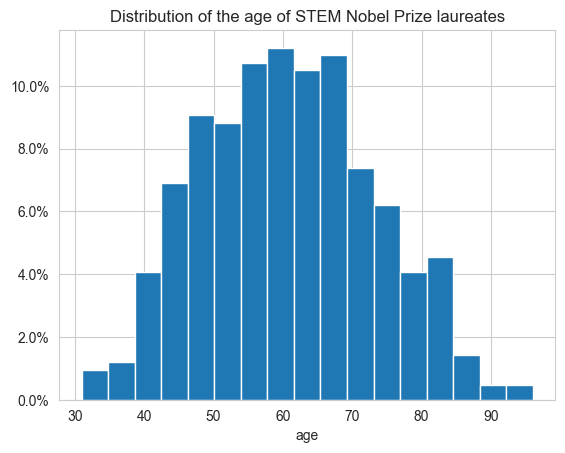

In [153]:
plt.hist(age.dt.days, bins=17, weights=np.ones(len(age.dt.days))/len(age))
plt.title("Distribution of the age of STEM Nobel Prize laureates")
plt.xlabel('age')
plt.savefig("img/age_distribution.jpg", bbox_inches='tight', pad_inches=0.2)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [154]:
# Percentage of null values in each column
missing_data = (100*country_data.isnull().sum().sort_values(ascending=False)/len(country_data)).round(1).astype(str) + " %"
missing_data.name = "Percentage of missing values"
missing_data

Gross national income per capita                                                                  98.4 %
High-technology exports (current US$)                                                             77.0 %
GDP growth (annual %)                                                                             75.8 %
Starting a business: Paid-in Minimum capital (% of income per capita) - Score                     74.0 %
Researchers in R&D (per million people)                                                           68.3 %
Wage bill as a percentage of GDP                                                                  68.1 %
Income share held by highest 10%                                                                  66.8 %
Research and development expenditure (% of GDP)                                                   64.7 %
GDP, PPP (constant 2017 international $)                                                          51.2 %
Government expenditure on education, total (% of GDP)  

In [155]:
research_duration = 10

from datetime import timedelta


#Primary school is for kids from 4 to 11


# Impact on primary education

print()

print("Shiftings:", median_age - 11 - std_age, median_age - 18 - std_age, median_age - std_age, median_age - 18 - 6 - std_age, median_age - 18 - std_age)
print("Periods:", (11 - 4 + std_age)*2, (18 - 4 + std_age)*2, research_duration, median_age, (18 - 4 + std_age)*2)
country_data['Primary education, duration (years)'] = country_data['Primary education, duration (years)'].shift(median_age - 11 - std_age).rolling((11 - 4 + std_age)*2, center=False, min_periods=1).mean()

# Impact during full education years
for col in ('Have a formal definition for financial education or financial literacy or financial capability',
            'National financial capability/literacy/education strategy (NFCS/NFLS/NFES) under development'):
    country_data[col] = country_data[col].shift(median_age - 18 - std_age).rolling((18 - 4 + std_age)*2, center=False, min_periods=1).mean()

# Impact during research years
for col in ('GDP growth (annual %)',
            'Gross national income per capita',
            'Starting a business: Paid-in Minimum capital (% of income per capita) - Score',
            'High-technology exports (current US$)'):
    country_data[col] = country_data[col].rolling(research_duration, center=False, min_periods=1).mean()

country_data['Research and development expenditure'] = country_data['GDP, PPP (constant 2017 international $)'].rolling(research_duration, center=False, min_periods=1).mean() * country_data['Research and development expenditure (% of GDP)'].rolling(research_duration, center=False, min_periods=1).mean()


# Impact during whole years
for col in ('GDP growth (annual %)',
            'Gross national income per capita',
            'Income share held by highest 10%',
            'GDP per capita (constant 2015 US$)'):
    country_data[col] = country_data[col].rolling(median_age + std_age, center=False, min_periods=1).mean()

# Impact on the moment of birth
country_data['Life expectancy at birth, total (years)'] = country_data['Life expectancy at birth, total (years)'].shift(median_age - std_age).rolling(std_age*2, center=False, min_periods=1).mean()

# Impact on higher education
country_data['School enrollment, tertiary (% gross)'] = country_data['School enrollment, tertiary (% gross)'].shift(median_age - 18 - 6 - std_age).rolling((6 + std_age)*2, center=False, min_periods=1).mean()

country_data['Patent applications'] = country_data['Patent applications, nonresidents'].rolling(median_age + std_age, center=False, min_periods=1).mean() + country_data['Patent applications, residents'].rolling(median_age + std_age, center=False, min_periods=1).mean()

country_data['Researchers in R&D'] = (country_data['Researchers in R&D (per million people)']*country_data['Population, total']).rolling(median_age + std_age, center=False, min_periods=1).mean()

country_data['Population in urban agglomerations of more than 1 million'] = country_data['Population in urban agglomerations of more than 1 million (% of total population)'].rolling(median_age + std_age, center=False, min_periods=1).mean()*country_data['Population, total'].rolling(median_age + std_age, center=False, min_periods=1).mean()


country_data['Research and development expenditure'] = country_data['GDP, PPP (constant 2017 international $)'].rolling(research_duration, center=False, min_periods=1).mean() * country_data['Research and development expenditure (% of GDP)'].shift(median_age - 18 - std_age).rolling(research_duration, center=False, min_periods=1).mean()
country_data['Government expenditure on education'] = country_data['GDP, PPP (constant 2017 international $)'].rolling(research_duration, center=False, min_periods=1).mean() * country_data['Government expenditure on education, total (% of GDP)'].shift(median_age - 18 - std_age).rolling((18 - 4 + std_age)*2, center=False, min_periods=1).mean()
country_data['Wage bill'] = country_data['GDP, PPP (constant 2017 international $)'].rolling(research_duration, center=False, min_periods=1).mean() * country_data['Wage bill as a percentage of GDP'].rolling(research_duration, center=False, min_periods=1).mean()

country_data.drop(['Patent applications, residents',
                   'Patent applications, nonresidents',
                   'Researchers in R&D (per million people)',
                   'Population in urban agglomerations of more than 1 million (% of total population)',
                   'Research and development expenditure (% of GDP)',
                   'Wage bill as a percentage of GDP',
                   'Government expenditure on education, total (% of GDP)',
                   'Research and development expenditure (% of GDP)'], axis=1, inplace=True)


Shiftings: 37 30 48 24 30
Periods: 38 52 10 60 52


In [156]:
# Percentage of null values in each column
missing_data = (100*country_data.isnull().sum().sort_values(ascending=False)/len(country_data)).round(1).astype(str) + " %"
missing_data.name = "Percentage of missing values"
missing_data

Research and development expenditure                                                              82.3 %
High-technology exports (current US$)                                                             63.2 %
Starting a business: Paid-in Minimum capital (% of income per capita) - Score                     61.0 %
Wage bill                                                                                         56.0 %
GDP, PPP (constant 2017 international $)                                                          51.2 %
Government expenditure on education                                                               39.1 %
Gross national income per capita                                                                   8.6 %
Researchers in R&D                                                                                 5.5 %
Have a formal definition for financial education or financial literacy or financial capability     4.4 %
Life expectancy at birth, total (years)                

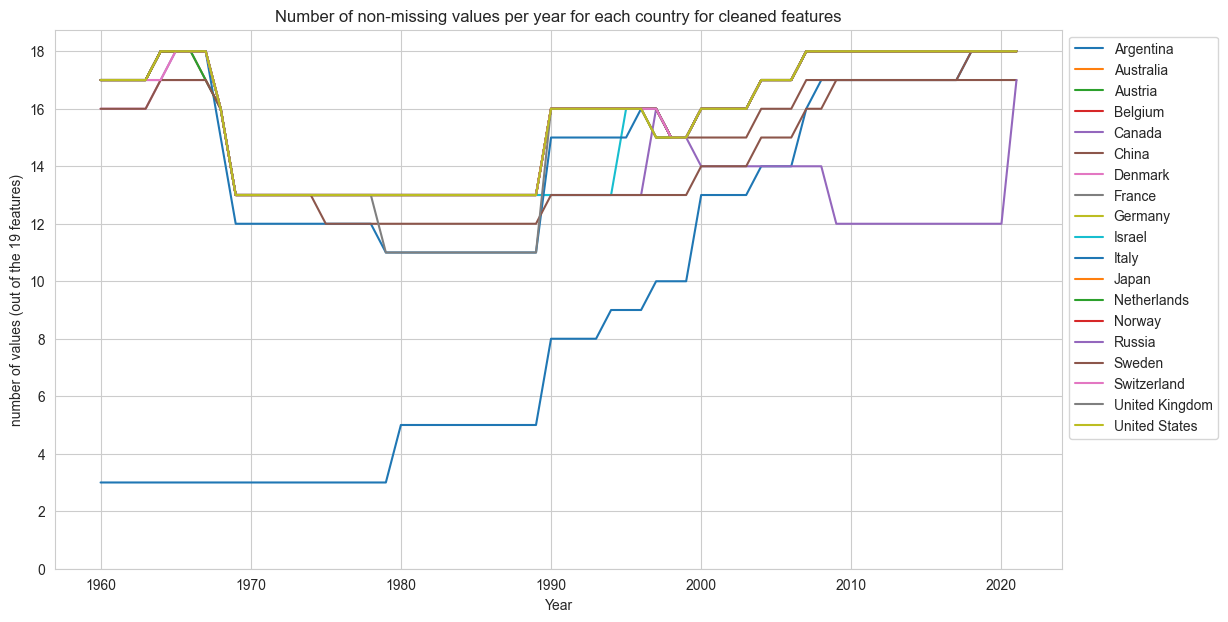

In [157]:
vals = country_data.notnull().sum(axis=1)
vals.name = "missing"
vals = vals.reset_index()

plt.figure(figsize=[13, 7])
for country in vals.country.unique():
    plt.plot(vals[vals.country == country].year, vals[vals.country == country].missing, label=country)
plt.title("Number of non-missing values per year for each country for cleaned features")
plt.xlabel("Year") # x label
plt.yticks(range(0, len(country_data.columns), 2))
plt.ylabel("number of values (out of the " + str(len(country_data.columns)) + " features)") # y label
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig("img/country_data_rolled.jpg", bbox_inches='tight', pad_inches=0.2)
plt.show() #display the plot

In [158]:
nobel_prizes['used'] = False
# Final dataset (to input in the model)
full_df = pd.DataFrame(columns=['country', 'year'] + country_data.columns.to_list() + ['Nobel Prize number'])

start = time.time()
# For each [Country]x[Year] on which we have data
for index, row in country_data.iterrows():

    # Get the Nobel Prizes won by the Country this year
    vals = nobel_prizes[(nobel_prizes.country == index[0]) & (nobel_prizes.year == index[1])]

    # List the categories in which the country has not won a Nobel Prize this year
    #missing_categories = set(nobel_prizes.Category.unique())

    if len(vals) > 0:

        nobel_prizes.loc[(nobel_prizes.country == index[0]) & (nobel_prizes.year == index[1]), 'used'] = True

        # If the Country has won at least one Nobel Prize this year
        #missing_categories -= set(vals.Category)  # Remove the categories won from the list of non-winning categories

        full_df.loc[len(full_df.index)] = list(index) + row.to_list() + [vals['Nobel Prize number'].sum()]

        # Iterate through the Nobel Prizes won by the Country this Year
        # for index2, NobelPrize in vals.iterrows():
        #     """
        #     Add a row combining the Country Name, the Year, the Nobel Prize category, the features known on [Country]x[Year]
        #     and the number of Nobel Prizes won (if multiple people from the same Country have won it this year)
        #     """
        #     full_df.loc[len(full_df.index)] = list(index) + [NobelPrize['Category']] + row.to_list() + [NobelPrize['Nobel Prize number']]

    else:
        full_df.loc[len(full_df.index)] = list(index) + row.to_list() + [0]

    # # For each Nobel Prize category that the Country haven't won that Year...
    # for missing_category in missing_categories:
    #
    #     """
    #     Add a row combining the Country Name, the Year, the Nobel Prize category, the features known on [Country]x[Year]
    #     and the number of Nobel Prizes won, that is zero
    #     """
    #     full_df.loc[len(full_df.index)] = list(index) + [missing_category] + row.to_list() + [0]

print("Duration: ", round((time.time() - start)/60, 1), "min\n\nFull assembled dataset:", sep='')
n_rows_full = len(full_df)
full_df

Duration: 0.1min

Full assembled dataset:


country  year  GDP growth (annual %)  \
0         Argentina  1960                    NaN   
1         Argentina  1961                    NaN   
2         Argentina  1962                    NaN   
3         Argentina  1963                    NaN   
4         Argentina  1964                    NaN   
...             ...   ...                    ...   
1173  United States  2017               3.055260   
1174  United States  2018               3.063845   
1175  United States  2019               3.103526   
1176  United States  2020               3.075911   
1177  United States  2021               2.959148   

      Primary education, duration (years)  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
...                                   ...   
1173                                  6.0   
1174                                  6.0   
1175                                  6.0   
1176                                  6.0   
1177                                  6.0   

      Have a formal definition for financial education or financial literacy or financial capability  \
0                                                   NaN                                                
1                                                   NaN                                                
2                                                   NaN                                                
3                                                   NaN                                                
4                                                   NaN                                                
...                                                 ...                                                
1173                                                1.0                                                
1174                                                1.0                                                
1175                                                1.0                                                
1176                                                1.0                                                
1177                                                1.0                                                

      National financial capability/literacy/education strategy (NFCS/NFLS/NFES) under development  \
0                                                   NaN                                              
1                                                   NaN                                              
2                                                   NaN                                              
3                                                   NaN                                              
4                                                   NaN                                              
...                                                 ...                                              
1173                                                0.0                                              
1174                                                0.0                                              
1175                                                0.0                                              
1176                                                0.0                                              
1177                                                0.0                                              

      Gross national income per capita  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
...                                ...   
1173                      41340.000000   
1174                      43324.5454

In [159]:
# List Nobel Prizes not included in the final dataset
print("Nobel Prizes of countries not having data:")
nobel_prizes[~nobel_prizes.used]

Nobel Prizes of countries not having data:


Empty DataFrame
Columns: [year, country, Category, Nobel Prize number, used]
Index: []

In [160]:
df = full_df

# Conversion of the number of Nobel Prize winners to a boolean column
df['Nobel Prize'] = df['Nobel Prize number'].astype(bool)
df.drop('Nobel Prize number', axis=1, inplace=True)

n_rows = len(df)
print("Selected data:")
df

Selected data:


country  year  GDP growth (annual %)  \
0         Argentina  1960                    NaN   
1         Argentina  1961                    NaN   
2         Argentina  1962                    NaN   
3         Argentina  1963                    NaN   
4         Argentina  1964                    NaN   
...             ...   ...                    ...   
1173  United States  2017               3.055260   
1174  United States  2018               3.063845   
1175  United States  2019               3.103526   
1176  United States  2020               3.075911   
1177  United States  2021               2.959148   

      Primary education, duration (years)  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
...                                   ...   
1173                                  6.0   
1174                                  6.0   
1175                                  6.0   
1176                                  6.0   
1177                                  6.0   

      Have a formal definition for financial education or financial literacy or financial capability  \
0                                                   NaN                                                
1                                                   NaN                                                
2                                                   NaN                                                
3                                                   NaN                                                
4                                                   NaN                                                
...                                                 ...                                                
1173                                                1.0                                                
1174                                                1.0                                                
1175                                                1.0                                                
1176                                                1.0                                                
1177                                                1.0                                                

      National financial capability/literacy/education strategy (NFCS/NFLS/NFES) under development  \
0                                                   NaN                                              
1                                                   NaN                                              
2                                                   NaN                                              
3                                                   NaN                                              
4                                                   NaN                                              
...                                                 ...                                              
1173                                                0.0                                              
1174                                                0.0                                              
1175                                                0.0                                              
1176                                                0.0                                              
1177                                                0.0                                              

      Gross national income per capita  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
...                                ...   
1173                      41340.000000   
1174                      43324.5454

# Selection of the data

In [161]:
n_selected_samples = len(df)
n_sick = df['Nobel Prize'].sum()

print(n_sick, "Nobel Prize winnings")

"""
Content of the new dataframe:
First n_sick samples: patients with acute encephalopathy
Rest of the dataset: healthy patients
"""
balanced_df = pd.concat([df[df['Nobel Prize']],
						 df[~df['Nobel Prize']].sample(n=randint(round(n_sick-n_sick*0.1), round(n_sick+n_sick*0.1)))]) #.sample(frac=1)

balanced_df = balanced_df.sort_values(['country', 'year']).groupby(['country', 'year']).mean()
balanced_df.to_csv("data/generated/df.csv")

balanced_df.to_csv("data/generated/df.csv")
print(len(balanced_df), "samples in the balanced dataset.\nNumber of null values:", balanced_df.isnull().sum().sum())
balanced_df

195 Nobel Prize winnings
390 samples in the balanced dataset.
Number of null values: 1463


GDP growth (annual %)  \
country       year                          
Argentina     1966                    NaN   
              1970                    NaN   
              1971                    NaN   
              1972                    NaN   
              1975                    NaN   
...                                   ...   
United States 2017               3.055260   
              2018               3.063845   
              2019               3.103526   
              2020               3.075911   
              2021               2.959148   

                    Primary education, duration (years)  \
country       year                                        
Argentina     1966                                  NaN   
              1970                                  NaN   
              1971                                  NaN   
              1972                                  NaN   
              1975                                  NaN   
...                                                 ...   
United States 2017                                  6.0   
              2018                                  6.0   
              2019                                  6.0   
              2020                                  6.0   
              2021                                  6.0   

                    Have a formal definition for financial education or financial literacy or financial capability  \
country       year                                                                                                   
Argentina     1966                                                NaN                                                
              1970                                                NaN                                                
              1971                                                NaN                                                
              1972                                                NaN                                                
              1975                                                NaN                                                
...                                                               ...                                                
United States 2017                                                1.0                                                
              2018                                                1.0                                                
              2019                                                1.0                                                
              2020                                                1.0                                                
              2021                                                1.0                                                

                    National financial capability/literacy/education strategy (NFCS/NFLS/NFES) under development  \
country       year                                                                                                 
Argentina     1966                                                NaN                                              
              1970                                                NaN                                              
              1971                                                NaN                                              
              1972                                                NaN                                              
              1975                                                NaN                                              
...                                                               ...                                              
United States 2017                                                0.0                                              
              2018                                                0.0                  

In [162]:
# Percentage of null values in each column
missing_data = (100*balanced_df[balanced_df['Nobel Prize']].isnull().sum().sort_values(ascending=False)/len(balanced_df[balanced_df['Nobel Prize']])).round(1).astype(str) + " %"
missing_data.name = "Percentage of missing values"
missing_data

KeyError: "None of [Float64Index([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,\n              ...\n              1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],\n             dtype='float64', length=390)] are in the [columns]"

In [ ]:
to_remove = df.columns[df.isnull().sum()/len(df) > 0.5]
print("Removing:\n", '\n'.join(to_remove.to_list()))
df.drop(to_remove, axis=1, inplace=True)

In [ ]:
# Percentage of null values in each column
missing_data = (100*balanced_df.isnull().sum()/len(balanced_df)).round(1).astype(str) + " %"
missing_data.name = "Percentage of missing values"
missing_data

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import isinf

cols = set(balanced_df.columns) - {"Nobel Prize", "country", "year", "Category"}
n_features = len(cols)
df[cols]
vif = [variance_inflation_factor(df[cols].values, i) for i in range(len(cols))]
max_vif = max(vif)


while not isinf(max_vif) and max_vif >= 10:
    idx = vif.index(max_vif)
    print("Dropping ", cols[idx], " (VIF of ", round(max_vif), ")", sep='')
    del cols[idx]
    vif = [variance_inflation_factor(df[cols].values, i) for i in range(len(cols))]
    max_vif = max(vif)

if isinf(max_vif):
	print("VIF inoperable: returns infinite value")

print(n_features - len(vif), "features removed,", len(vif), "remaining")
pd.Series(vif, index=cols, name="VIF").sort_values(ascending=False)

Note: we probably will have to balance the dataset, that is reduce the number of rows with no Nobel Prize won